<a href="https://colab.research.google.com/github/kirankumar17-sk/Customer-Purchase-Behavior-Analysis-and-Prediction/blob/main/Customer_Purchase_Behavior_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_excel("sample_data/online_retail.xlsx")

# Basic Info
print(df.head())
print(df.info())
print(df.describe())

# Handle Missing Values
df.dropna(subset=['CustomerID'], inplace=True)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [3]:
conn = sqlite3.connect('customer_data.db')
df.to_sql('retail', conn, if_exists='replace', index=False)

# SQL Example
query = """
SELECT Country, SUM(TotalPrice) as Total_Sales
FROM retail
GROUP BY Country
ORDER BY Total_Sales DESC
LIMIT 10;
"""
sql_df = pd.read_sql(query, conn)
print(sql_df)


          Country   Total_Sales
0  United Kingdom  6.767873e+06
1     Netherlands  2.846615e+05
2            EIRE  2.502852e+05
3         Germany  2.216982e+05
4          France  1.967128e+05
5       Australia  1.370773e+05
6     Switzerland  5.573940e+04
7           Spain  5.477458e+04
8         Belgium  4.091096e+04
9          Sweden  3.659591e+04


In [4]:
# Hypothesis: Are UK and Germany average purchase amounts different?
uk = df[df['Country'] == 'United Kingdom']['TotalPrice']
germany = df[df['Country'] == 'Germany']['TotalPrice']

t_stat, p_val = stats.ttest_ind(uk, germany, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Significant difference in spending behavior.")
else:
    print("No significant difference.")


T-stat: -5.5105910143364385, P-value: 3.581777709148797e-08
Significant difference in spending behavior.


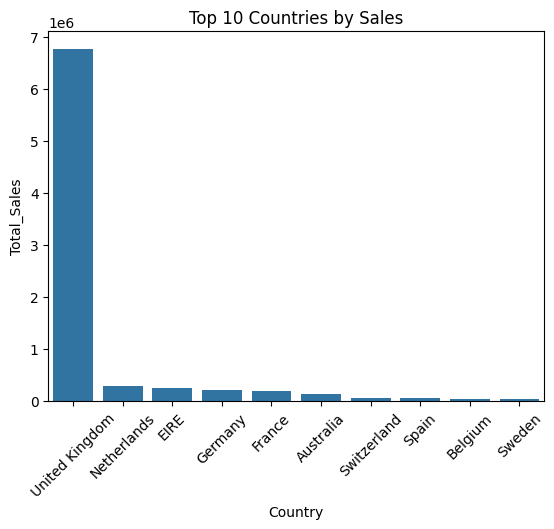

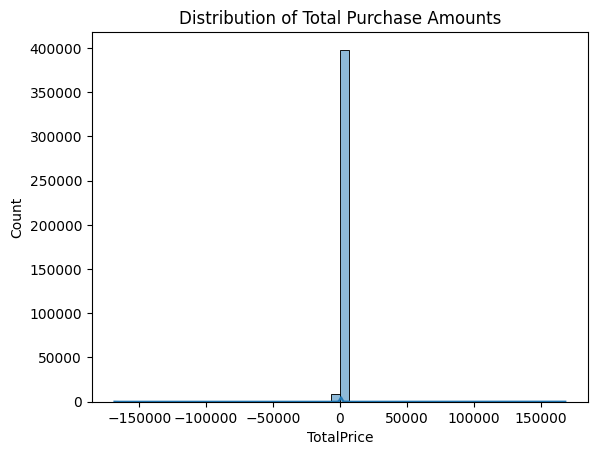

In [5]:
sns.barplot(data=sql_df, x='Country', y='Total_Sales')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Sales')
plt.show()

sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Purchase Amounts')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df['HighValue'] = np.where(df['TotalPrice'] > df['TotalPrice'].median(), 1, 0)
features = df[['Quantity', 'UnitPrice']]
labels = df['HighValue']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9999877098542389
